             Pays  Valeur continents_y
0     Afghanistan   30552         Asie
1     Afghanistan   30552         Asie
2     Afghanistan   30552         Asie
3     Afghanistan   30552         Asie
4     Afghanistan   30552          Imp
...           ...     ...          ...
3929     Zimbabwe   14150        Monde
3930     Zimbabwe   14150         Pays
3931     Zimbabwe   14150         Pays
3932     Zimbabwe   14150         Pays
3933     Zimbabwe   14150         Pays

[3934 rows x 3 columns]


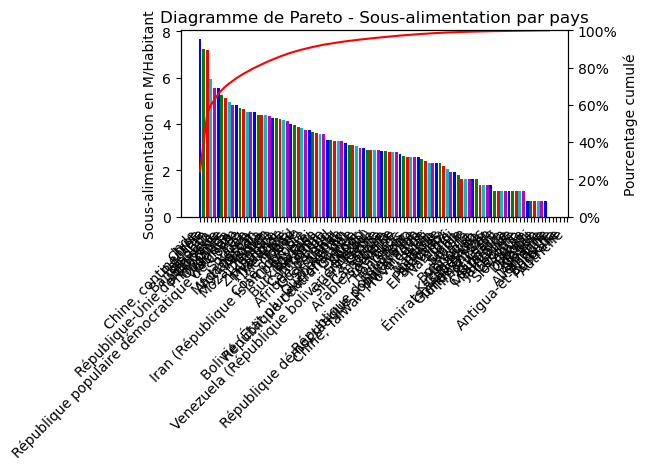

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

# Chargement et préparation des données
names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
         'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
         'Valeur', 'Symbole', 'Description du Symbole']

fn_pop='FAOSTAT_2013_population.csv'
fn_continent = 'FAOSTAT_2013_Continent.csv'
fn_s_a='FAOSTAT_2013_sous_alimentation.csv'


# création des dataframes
df_pop = pd.read_csv(fn_pop, names=names, header=0)
df_cont = pd.read_csv(fn_continent, header=0)
df_s_a = pd.read_csv(fn_s_a, names=names, header=0)
#suppression des valeur null
df_s_a.dropna(subset=['Valeur'])
#création d'un nouveaux df avec deux colonne
df = df_s_a[['Pays','Valeur']]
df_cont = df_cont[['Groupe de pays','Pays' ]]
#print(df_cont)

#Récuperer l'index 0 du dataframe continen a la colonne Groupe de Pays
#continent = df_cont['Groupe de pays'][0]
#print(continent)

df_cont['continents'] = df_cont['Groupe de pays'].apply(lambda x: x.split()[0] )
#print(df_cont)

df3 = pd.merge(df_pop, df_cont, on=['Pays'])
df3 = pd.merge(df3, df_cont, on=['Pays'])
print(df3[['Pays','Valeur','continents_y']])


# Trier le DataFrame par la colonne 'Valeur' en ordre décroissant
df = df.sort_values(by='Valeur', ascending=False)

# Calculer la somme cumulée de la colonne 'Valeur'
df['Valeur_cum'] = df['Valeur'].cumsum()

# Calculer le pourcentage cumulé de la colonne 'Valeur'
df['Valeur_pct'] = df['Valeur_cum'] / df['Valeur'].sum()*100

#Couleur en fonction du continent correspondant

colors = ['b', 'g', 'r', 'c', 'm']


# Pour chaque ligne du DataFrame
for index, row in df.iterrows():
  # Si la valeur de la colonne 'Pays' est 'Afrique'
  if row['Pays'] == 'Afrique':
    # Ajout de la couleur 'vert' à la liste des couleurs des barres du graphique
    colors.append('vert')
  # Si la valeur de la colonne 'Pays' est 'Europe'
  elif row['Pays'] == 'Europe':
    # Ajout de la couleur 'bleu' à la liste des couleurs des barres du graphique
    colors.append('bleu')
  # Si la valeur de la colonne 'Pays' est 'Asie'
  elif row['Pays'] == 'Asie':
    # Ajout de la couleur 'jaune' à la liste des couleurs des barres du graphique
    colors.append('jaune')
  # Si la valeur de la colonne 'Pays' est 'Amérique'
  elif row['Pays'] == 'Amérique':
    # Ajout de la couleur 'orange' à la liste des couleurs des barres du graphique
    colors.append('orange')
  # Si la valeur de la colonne 'Pays' est 'Océanie'
  elif row['Pays'] == 'Océanie':
    # Ajout de la couleur 'rouge' à la liste des couleurs des barres du graphique
    colors.append('rouge')

# Création du graphique à barres
fig, ax1 = plt.subplots()
ax1.bar(df['Pays'], np.log(df['Valeur']*10),color=colors)

# Création d'un deuxième axe des y
ax2 = ax1.twinx()

# Réglage de l'axe des y allant de 0 à 100%
ax2.set_ylim(0, 100)

# Création d'un formateur de pourcentage
formatter = PercentFormatter(xmax=100)

# Réglage de l'axe des y avec le formateur de pourcentage
ax2.yaxis.set_major_formatter(formatter)

# Tracé du deuxième axe des y
ax2.plot(df['Pays'], df['Valeur_pct'], color='red')

# Mise des étiquettes de pourcentage à droite de l'axe des y
ax2.tick_params(axis='y', which='both', labelright=True)

# Ajout d'un titre au graphique
plt.title("Diagramme de Pareto - Sous-alimentation par pays")

# Ajout d'une étiquette pour l'axe des x
plt.xlabel("Pays")

# Faire tourner les étiquettes des valeurs sur l'axe des x
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")


# Ajout d'une étiquette pour l'axe des y de gauche (valeurs en pourcentage)
ax1.set_ylabel("Sous-alimentation en M/Habitant")

# Ajout d'une étiquette pour l'axe des y de droite (pourcentage cumulé)
ax2.set_ylabel("Pourcentage cumulé")


# Ajuster les marges du graphique
plt.tight_layout()

# Affichage du graphique
plt.show()


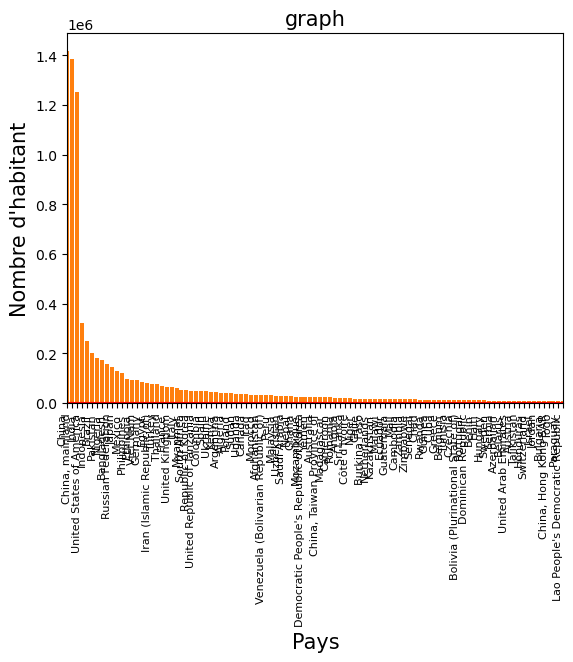

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
         'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
         'Valeur', 'Symbole', 'Description du Symbole']



fn_pop='FAOSTAT_2013_population.csv'

df_s_a = pd.read_csv(fn_pop, names=names, header=0)
df_s_a.dropna(subset=['Valeur'])
df = df_s_a[['Pays','Valeur']]
df






# Trier le DataFrame par la colonne 'Valeur en ordre décroissant
df = df.sort_values(by='Valeur', ascending=False)

# Calculer la somme cumulée de la colonne 'Valeur'
df['Valeur_cum'] = df['Valeur'].cumsum()

# Calculer le pourcentage cumulé de la colonne 'Valeur'
df['Valeur_pct'] = df['Valeur_cum'] / df['Valeur'].sum()

x = df['Pays']
y = df['Valeur']

fig, ax = plt.subplots()
ax.bar(x, y)

# Faire tourner les étiquettes des valeurs sur l'axe des x
plt.xticks(rotation=90, ha="right", fontsize=8)


plt.title("graph",fontsize=15)

plt.xlabel("Pays", fontsize=15)

plt.ylabel("Nombre d'habitant",fontsize=15)
# Créer le diagramme de Pareto


ax.bar(df['Pays'], df['Valeur'])
ax.plot(df['Pays'], df['Valeur_pct'], color='red')
ax.set_xlim(0, 100)
# Afficher le diagramme
plt.show()
